In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [47]:
dataset = pd.read_csv('../Data/dataset.csv')
dataset = dataset[['Protein', 'Leukocyte', 'SG', 'Bilirubin', 'Acidity', 'Nitrite',
                   'Urobilinogen','Occult_blood', 'Ketone_body', 'Glucose']]

dataset.head(3)

,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Urobilinogen,Occult_blood,Ketone_body,Glucose
0,1,119,1.020,0.1,5.0,103842,0.7,3,1,16
1,4,106,1.020,0.0,5.0,108098,0.7,2,1,65
2,6,657,1.016,0.1,5.0,27515,0.7,40,3,79


In [48]:
dataset.corr()['Urobilinogen'].abs().sort_values(ascending=False)

Urobilinogen    1.000000
Leukocyte       0.274540
Occult_blood    0.131899
Bilirubin       0.120701
Glucose         0.076340
Acidity         0.070447
Nitrite         0.049850
Ketone_body     0.037152
Protein         0.024815
SG              0.004718
Name: Urobilinogen, dtype: float64

In [49]:
# Selecing columns

dataset = dataset[['Protein', 'Leukocyte', 'SG', 'Bilirubin', 'Acidity', 'Nitrite',
                   'Occult_blood', 'Ketone_body', 'Glucose', 'Urobilinogen']]

dataset.head(3)

,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Occult_blood,Ketone_body,Glucose,Urobilinogen
0,1,119,1.020,0.1,5.0,103842,3,1,16,0.7
1,4,106,1.020,0.0,5.0,108098,2,1,65,0.7
2,6,657,1.016,0.1,5.0,27515,40,3,79,0.7


In [50]:
dataset.shape

(74337, 10)

In [51]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X.shape, y.shape

((74337, 9), (74337,))

# Train, Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

X_train.shape, X_test.shape

((59469, 9), (14868, 9))

In [13]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

# X_train.shape, X_val.shape

((47575, 3), (11894, 3))

# Data Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
# X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [56]:
X_train[:5, :]

array([[-0.4568329 , -0.53870365, -0.59688789,  0.19038558,  0.27419382,
         0.67809502, -0.68592602, -0.52379031, -0.6161976 ],
       [-0.44443037, -0.48245593, -0.34512929, -0.54462091, -0.87977981,
         0.0413241 , -0.55110695, -0.55737155, -0.55352856],
       [-0.48411847, -0.55628106, -1.60392227,  0.55788882, -0.87977981,
         1.91393744,  1.72284137, -0.49020907, -0.65403552],
       [-0.44443037, -0.48245593,  0.91366369, -0.54462091, -0.87977981,
         0.0413241 ,  2.00596142,  1.96122139, -0.55352856],
       [ 0.03926827, -0.40863081, -0.84864648,  0.55788882, -0.49512194,
         1.32531027, -0.12867386, -0.55737155, -0.60792056]])

# Modeling

## 1. RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [13]:
params = {
    'n_estimators' : range(100, 200, 5),
    'verbose' : [True]
}

In [14]:
rfr = RandomForestRegressor(n_jobs=8, random_state=2022)

In [15]:
# 0값 확인
# 0값 존재 -> MAPE 사용 불가 (실제 y값으로 나누기 때문(y > 0 필수))

len(dataset.loc[dataset.Urobilinogen == 0])

2400

In [16]:
kfold = KFold(10, shuffle=True, random_state=2022)

### Learning

In [17]:
grid = GridSearchCV(rfr, params, n_jobs=8, cv=kfold, refit=True)
grid.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 195 out of 195 | elapsed:    5.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=8, random_state=2022),
             n_jobs=8,
             param_grid={'n_estimators': range(100, 200, 5), 'verbose': [True]})

In [18]:
grid.best_params_

{'n_estimators': 195, 'verbose': True}

In [19]:
y_pred = grid.best_estimator_.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 195 out of 195 | elapsed:    0.0s finished


### Evaluating

In [58]:
from sklearn.metrics import mean_absolute_percentage_error, \
                            mean_absolute_error, mean_squared_error

In [21]:
mean_absolute_percentage_error(y_test, y_pred)

36366298234603.164

In [22]:
mean_absolute_error(y_test, y_pred)

0.15263642034835342

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5327420173285053

In [45]:
# Test_data 14868개 중 MAE 값이 0.15263 -> data 하나당 평균 오차 약 0.00001

print('Mean:', y_test.mean())
print('Meidan:', y_test.median())
print('Max:', y_test.max())
print('Min:', y_test.min())
print('y_test length:', len(y_test))
print('Average Error: ', mean_absolute_error(y_test, y_pred) / len(y_test))

Mean: 0.6822881355932202
Meidan: 0.5
Max: 18.8
Min: 0.0
y_test length: 14868
Average Error:  1.02661e-05


### Comparising y_pred, y_result

In [28]:
comparison = pd.DataFrame({'prediction' : y_pred, 'result' : y_test.values.ravel()})

In [29]:
comparison

,prediction,result
0,0.500000,0.5
1,0.300000,0.3
2,1.844879,0.8
3,0.500000,0.5
4,0.001538,0.0
...,...,...
14863,0.300000,0.3
14864,0.500000,0.5
14865,0.445641,0.6
14866,0.900000,0.9


### Saving Model

In [59]:
import pickle

In [31]:
saved_model = pickle.dump(grid.best_estimator_, open('../Model/{0}_RFT_n_{1}.pkl' \
    .format(dataset.columns[-1], grid.best_params_.get('n_estimators')), 'wb'),
                          protocol=pickle.HIGHEST_PROTOCOL)

### Loading Model

In [60]:
loaded_model = pickle.load(open('../Model/{0}_RFT_n_195.pkl' \
    .format(dataset.columns[-1]), 'rb'))

In [61]:
y_pred = loaded_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 195 out of 195 | elapsed:    0.0s finished


In [62]:
mean_absolute_error(y_test, y_pred)

0.15263642034835342

In [63]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5327420173285053

### Visualization

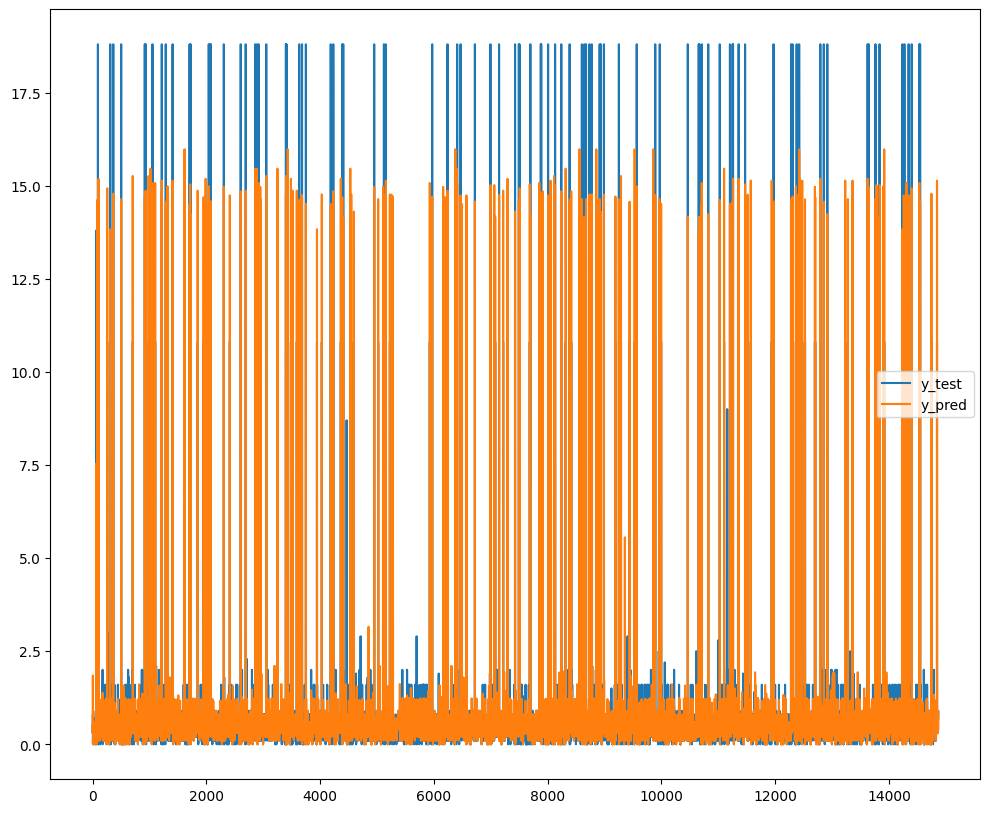

In [64]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel(), label='y_test')
plt.plot(y_pred, label='y_pred')

plt.legend()
plt.show()

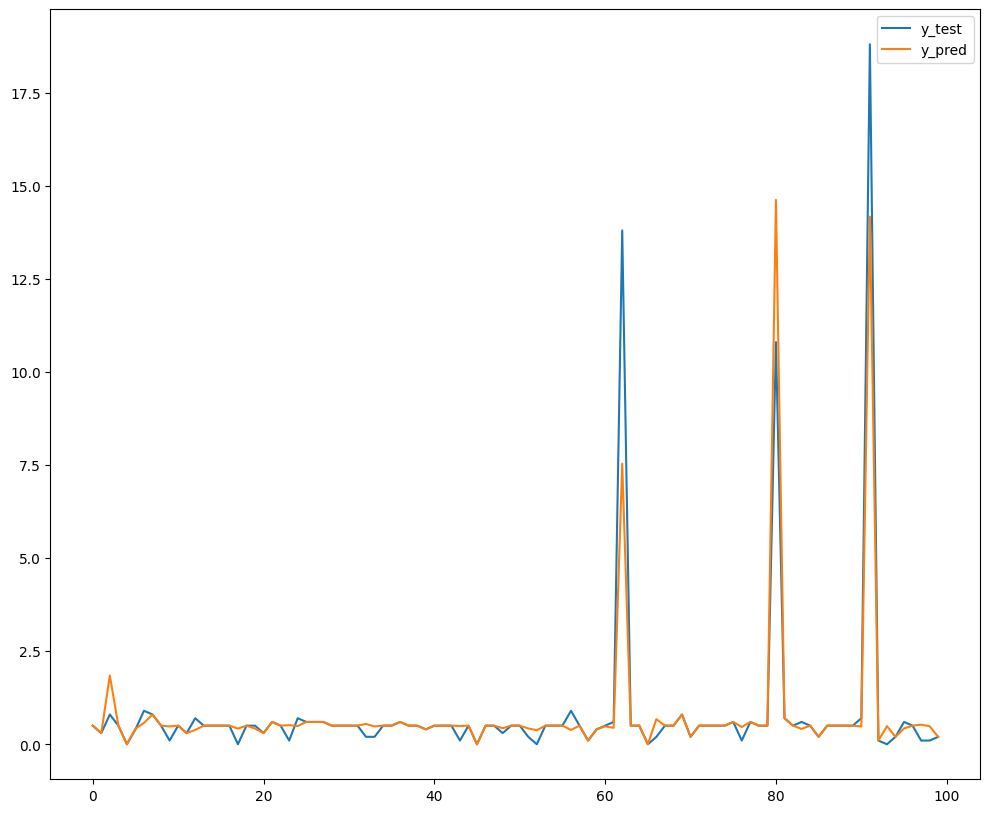

In [65]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel().reshape(-1)[:100], label='y_test')
plt.plot(y_pred.reshape(-1)[:100], label='y_pred')

plt.legend()
plt.show()